# World Happiness Report Analysis
https://www.kaggle.com/unsdsn/world-happiness
### Problem Definition and Objectives
This dataset is derived from the World Happiness Reports starting from 2012, ranking 155 countries based on happiness levels.

The scores are calculated based on six main factors:
- GDP per Capita
- Social Support
- Healthy Life Expectancy
- Freedom to Make Life Choices
- Generosity
- Perceptions of Corruption

The main questions this project aims to answer are:
- What countries or regions rank highest in overall happiness and contributing factors?
- How did country scores or ranks change between 2015–2016 and 2016–2017?
- Did any country experience a significant increase or decrease in happiness?


## 1. Importing Libraries and Loading Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load datasets
happiness_2015 = pd.read_csv('2015.csv')
happiness_2016 = pd.read_csv('2016.csv')
happiness_2017 = pd.read_csv('2017.csv')

## 2. Data Cleaning & Preparation

In [3]:
# Rename columns for consistency
happiness_2015.rename(columns={
    'Happiness Score': 'Score',
    'Economy (GDP per Capita)': 'GDP per Capita',
    'Health (Life Expectancy)': 'Life Expectancy',
    'Trust (Government Corruption)': 'Trust'
}, inplace=True)
happiness_2015['Year'] = 2015

happiness_2016.rename(columns={
    'Happiness Score': 'Score',
    'Economy (GDP per Capita)': 'GDP per Capita',
    'Health (Life Expectancy)': 'Life Expectancy',
    'Trust (Government Corruption)': 'Trust'
}, inplace=True)
happiness_2016['Year'] = 2016

# For 2017 data
happiness_2017.rename(columns={
    'Happiness.Score': 'Score',
    'Economy..GDP.per.Capita.': 'GDP per Capita',
    'Health..Life.Expectancy.': 'Life Expectancy',
    'Trust..Government.Corruption.': 'Trust',
    'Freedom': 'Freedom',
    'Generosity': 'Generosity',
    'Family': 'Family'
}, inplace=True)
happiness_2017['Year'] = 2017

## 3. Exploratory Data Analysis: Top 10 Countries

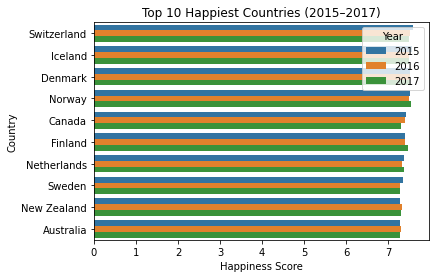

In [4]:
combined_df = pd.concat([happiness_2015, happiness_2016, happiness_2017], ignore_index=True)
top10 = combined_df.groupby('Year').apply(lambda x: x.nlargest(10, 'Score')).reset_index(drop=True)
sns.barplot(data=top10, x='Score', y='Country', hue='Year')
plt.title('Top 10 Happiest Countries (2015–2017)')
plt.xlabel('Happiness Score')
plt.ylabel('Country')
plt.legend(title='Year')
plt.show()

## 4. Score Changes Between Years

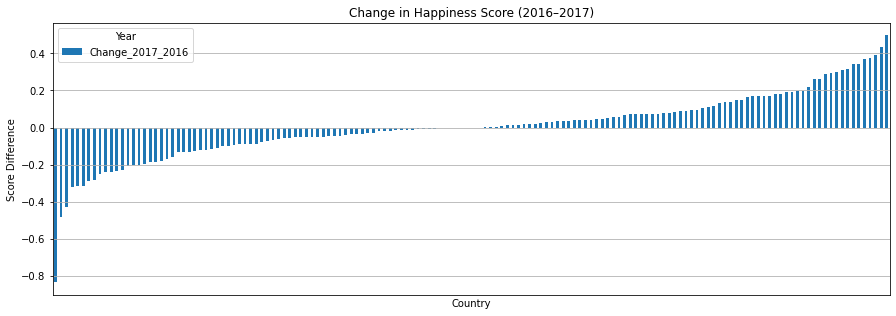

In [5]:
# Pivot and calculate changes
score_change = combined_df.pivot_table(index='Country', columns='Year', values='Score')
score_change['Change_2016_2015'] = score_change[2016] - score_change[2015]
score_change['Change_2017_2016'] = score_change[2017] - score_change[2016]

# Visualize change
score_change_sorted = score_change.sort_values(by='Change_2017_2016')
score_change_sorted[['Change_2017_2016']].dropna().plot(kind='bar', figsize=(15,5))
plt.title('Change in Happiness Score (2016–2017)')
plt.xlabel('Country')
plt.ylabel('Score Difference')
plt.xticks([], [])
plt.grid(True)
plt.show()

## 5. Correlation Between Factors and Score

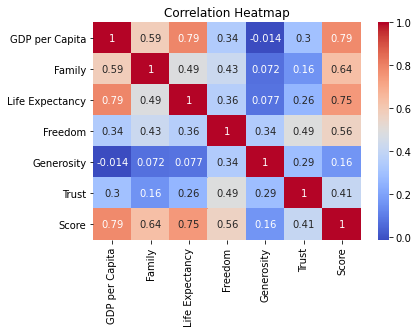

In [6]:
features = ['GDP per Capita', 'Family', 'Life Expectancy', 'Freedom', 'Generosity', 'Trust', 'Score']
correlation = combined_df[features].corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

## 6. Conclusion
- Northern European countries consistently rank highest in happiness.
- GDP, social support, and life expectancy are strongly correlated with happiness.
- Some countries saw significant gains or drops in happiness between years.
- Policymakers should focus on economic and social supports to boost well-being.